In [3]:
import pandas as pd
import numpy as np

# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train_df = train.copy()
test_df = test.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 

train_df[['연', '월', '일', '시간']] = train['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다 
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다 

# 해당 과정을 test_x에 대해서도 반복해줍니다 
test_df[['연', '월', '일', '시간']] = test['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])


In [5]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])


In [6]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])


In [8]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(train.dtypes[train.dtypes == "object"].index)
# 추출된 문자열 변수 확인
display(categorical_features)

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train[i]) 
    train[i]=le.transform(train[i])
    
    
    
display(train.head())


['법규위반',
 '가해운전자 차종',
 '가해운전자 성별',
 '가해운전자 연령',
 '가해운전자 상해정도',
 '피해운전자 차종',
 '피해운전자 성별',
 '피해운전자 연령',
 '피해운전자 상해정도']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,0,0,6,2,155,6,0,0,2,7,...,4,4,2,66,5,0,1,0,0,5
1,1,0,6,5,4,6,0,0,5,2,...,4,4,1,56,0,0,0,1,0,3
2,2,1,6,2,124,6,0,0,9,7,...,4,4,1,30,0,0,0,1,0,3
3,3,2,6,2,98,6,0,1,10,7,...,4,6,1,28,5,0,1,0,0,5
4,4,3,6,2,65,6,0,1,10,7,...,4,6,1,46,0,0,0,1,0,3


/Users/itaeyun/opt/anaconda3/envs/ensamble/lib/python3.8/site-packages/seaborn/utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/itaeyun/opt/anaconda3/envs/ensamble/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


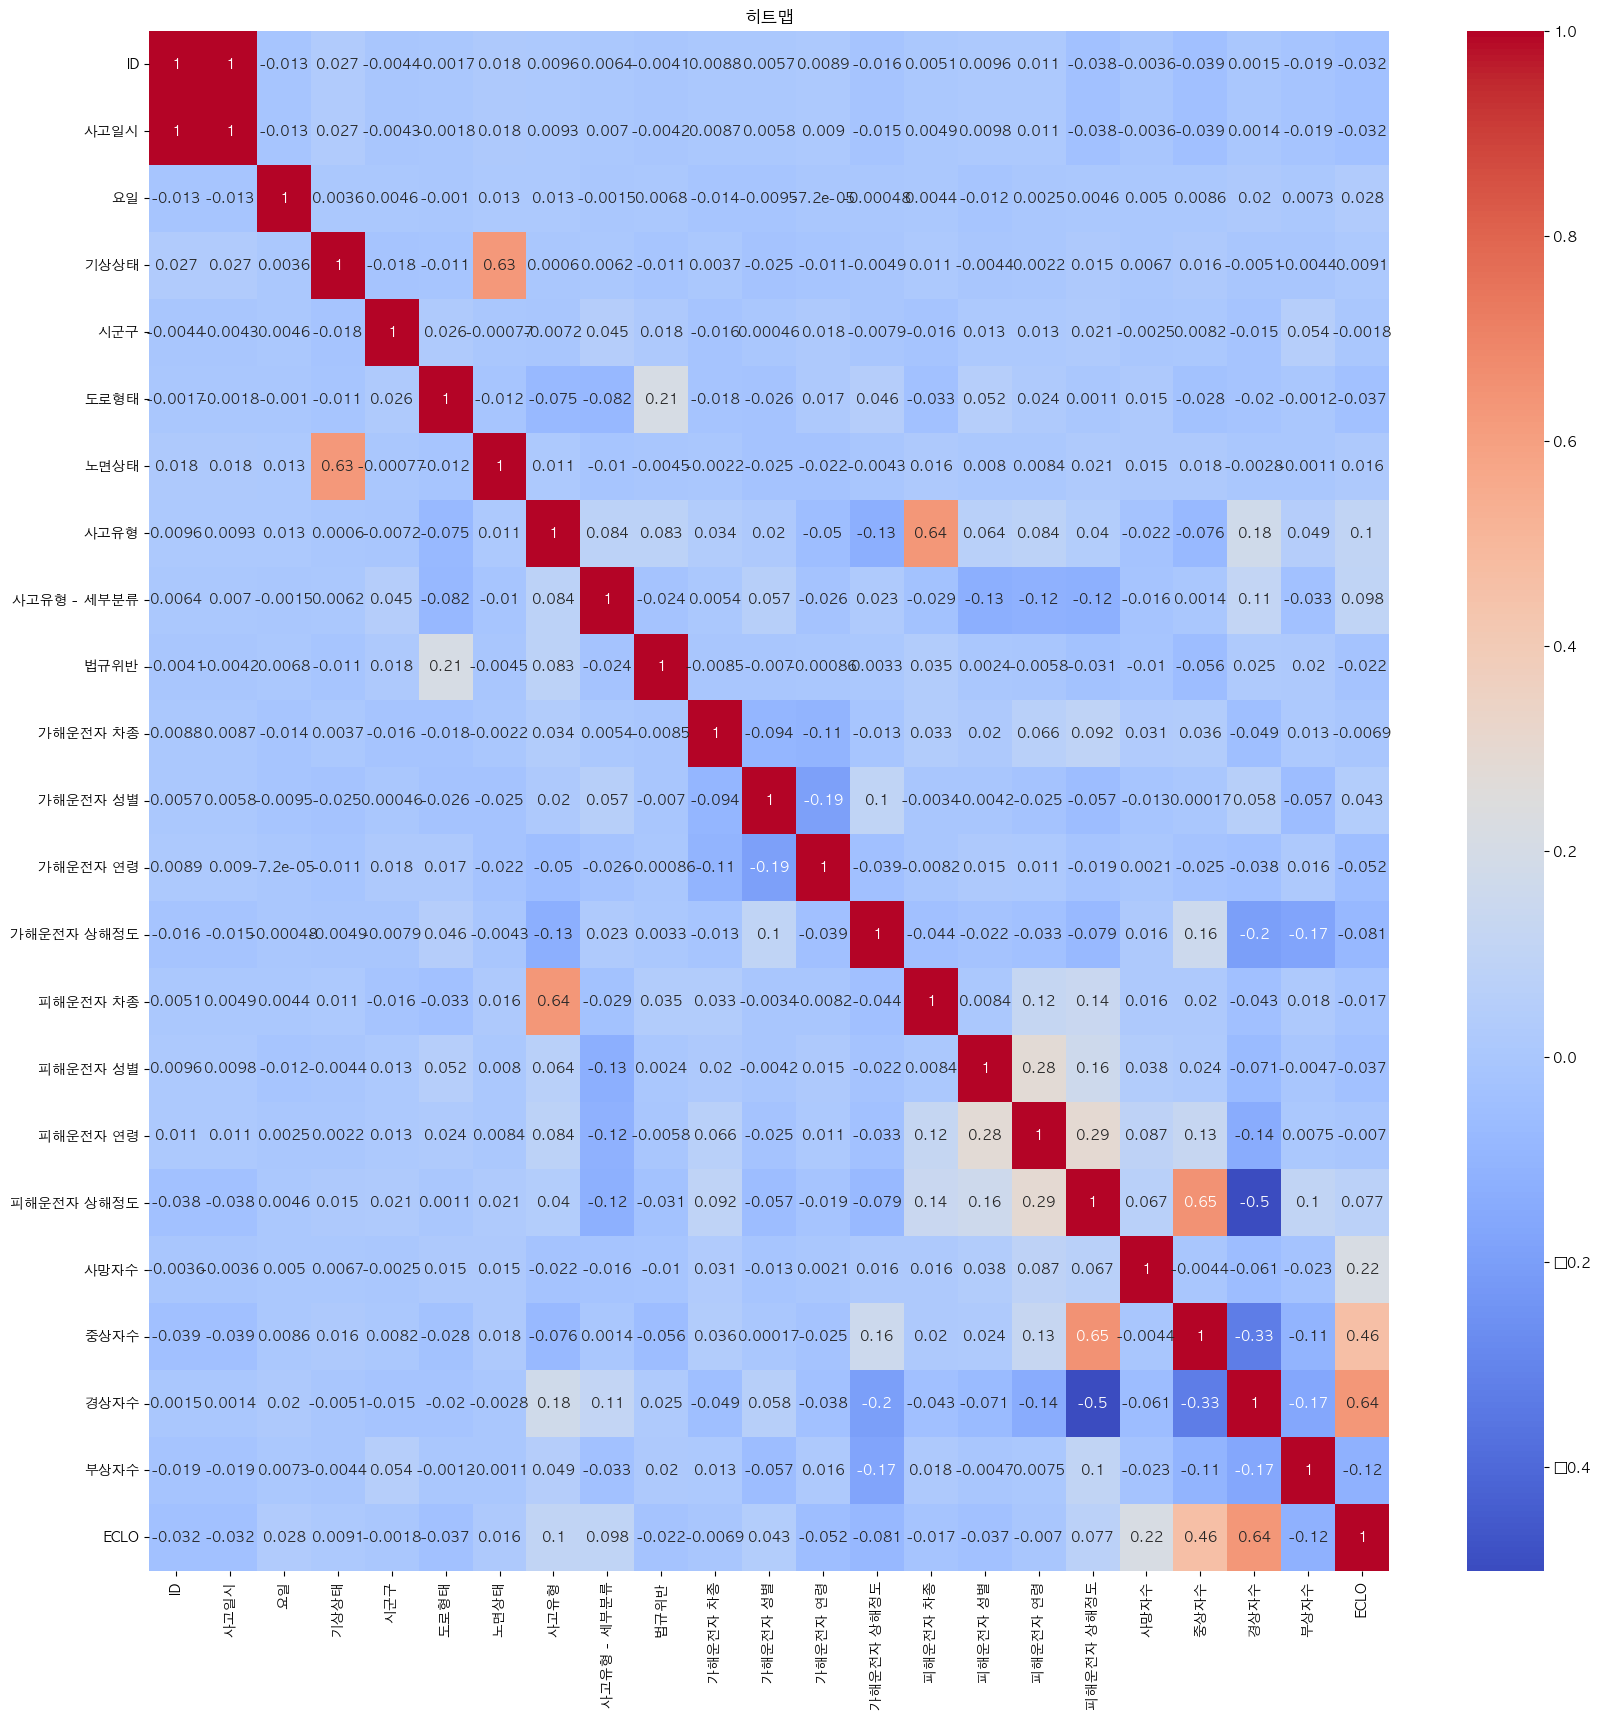

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# MAC에서 한글 깨짐 이슈
# 폰트 직접 지정
plt.rcParams["font.family"] = 'AppleGothic'

# 상관계수 계산
correlation = train.corr()

# 히트맵 생성
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('히트맵')
plt.show()
